In [1]:
import sys
sys.path.append("..")

In [2]:
import numpy as np
import pickle
from recnn.preprocessing import load_from_pickle

# W vs QCD

In [3]:
background = load_from_pickle("/home/gilles/gdrive/research/sandbox/learning-qcd-rnn/data/w-vs-qcd/anti-kt/antikt-qcd.pickle", 100000)
signal = load_from_pickle("/home/gilles/gdrive/research/sandbox/learning-qcd-rnn/data/w-vs-qcd/anti-kt/antikt-w.pickle", 100000)

X_train = []
y_train = []
X_test = []
y_test = []

for i in range(90000):
    X_train.append(background[i])
    y_train.append(0)
for i in range(90000):
    X_train.append(signal[i])
    y_train.append(1)
for i in range(90000, 100000):
    X_test.append(background[i])
    y_test.append(0)
for i in range(90000, 100000):
    X_test.append(signal[i])
    y_test.append(1)
    
fd = open("../data/w-vs-qcd/anti-kt/antikt-train.pickle", "wb")
pickle.dump((X_train, y_train), fd, protocol=pickle.HIGHEST_PROTOCOL)
fd.close()
fd = open("../data/w-vs-qcd/anti-kt/antikt-test.pickle", "wb")
pickle.dump((X_test, y_test), fd, protocol=pickle.HIGHEST_PROTOCOL)
fd.close()

In [3]:
# delphes data
background = load_from_pickle("/home/gilles/gdrive/research/sandbox/learning-qcd-rnn/data/w-vs-qcd/anti-kt/antikt-qcd-delphes.pickle", 100000)
signal = load_from_pickle("/home/gilles/gdrive/research/sandbox/learning-qcd-rnn/data/w-vs-qcd/anti-kt/antikt-w-delphes.pickle", 100000)

X_train = []
y_train = []
X_test = []
y_test = []

for i in range(90000):
    X_train.append(background[i])
    y_train.append(0)
for i in range(90000):
    X_train.append(signal[i])
    y_train.append(1)
for i in range(90000, 100000):
    X_test.append(background[i])
    y_test.append(0)
for i in range(90000, 100000):
    X_test.append(signal[i])
    y_test.append(1)
    
fd = open("../data/w-vs-qcd/anti-kt/antikt-delphes-train.pickle", "wb")
pickle.dump((X_train, y_train), fd, protocol=pickle.HIGHEST_PROTOCOL)
fd.close()
fd = open("../data/w-vs-qcd/anti-kt/antikt-delphes-test.pickle", "wb")
pickle.dump((X_test, y_test), fd, protocol=pickle.HIGHEST_PROTOCOL)
fd.close()

In [3]:
# images data
background = load_from_pickle("/home/gilles/gdrive/research/sandbox/learning-qcd-rnn/data/w-vs-qcd/anti-kt/images-qcd.pickle", 100000)
signal = load_from_pickle("/home/gilles/gdrive/research/sandbox/learning-qcd-rnn/data/w-vs-qcd/anti-kt/images-w.pickle", 100000)

X_train = []
y_train = []
X_test = []
y_test = []

for i in range(90000):
    X_train.append(background[i])
    y_train.append(0)
for i in range(90000):
    X_train.append(signal[i])
    y_train.append(1)
for i in range(90000, 100000):
    X_test.append(background[i])
    y_test.append(0)
for i in range(90000, 100000):
    X_test.append(signal[i])
    y_test.append(1)
    
fd = open("../data/w-vs-qcd/anti-kt/images-train.pickle", "wb")
pickle.dump((X_train, y_train), fd, protocol=pickle.HIGHEST_PROTOCOL)
fd.close()
fd = open("../data/w-vs-qcd/anti-kt/images-test.pickle", "wb")
pickle.dump((X_test, y_test), fd, protocol=pickle.HIGHEST_PROTOCOL)
fd.close()

In [4]:
import pickle

fd = open("../data/w-vs-qcd/anti-kt/images-train.pickle", "rb")
X, y = pickle.load(fd)
fd.close()

indices = np.random.permutation(len(X))
X = [X[i] for i in indices[:80000]]
y = [y[i] for i in indices[:80000]]

fd = open("../data/w-vs-qcd/anti-kt/images-train-80k.pickle", "wb")
pickle.dump((X, y), fd, protocol=pickle.HIGHEST_PROTOCOL)
fd.close()

In [4]:
# event-level data
fd_background = open("/home/gilles/gdrive/research/sandbox/learning-qcd-rnn/data/w-vs-qcd/anti-kt/antikt-qcd-event.pickle", "rb")
fd_signal = open("/home/gilles/gdrive/research/sandbox/learning-qcd-rnn/data/w-vs-qcd/anti-kt/antikt-w-event.pickle", "rb")
# fd_background = open("/home/gilles/gdrive/research/sandbox/learning-qcd-rnn/data/w-vs-qcd/anti-kt/antikt-delphes-qcd-event.pickle", "rb")
# fd_signal = open("/home/gilles/gdrive/research/sandbox/learning-qcd-rnn/data/w-vs-qcd/anti-kt/antikt-delphes-w-event.pickle", "rb")

fd_train = open("../data/w-vs-qcd/anti-kt/antikt-event-train.pickle", "wb")
# fd_train = open("../data/w-vs-qcd/anti-kt/antikt-delphes-event-train.pickle", "wb")
for i in range(40000):
    event = pickle.load(fd_background)
    pickle.dump((event, 0), fd_train, protocol=2)
    event = pickle.load(fd_signal)
    pickle.dump((event, 1), fd_train, protocol=2)
fd_train.close()

fd_test = open("../data/w-vs-qcd/anti-kt/antikt-event-test.pickle", "wb")
# fd_test = open("../data/w-vs-qcd/anti-kt/antikt-delphes-event-test.pickle", "wb")
for i in range(10000):
    event = pickle.load(fd_background)
    pickle.dump((event, 0), fd_test, protocol=2)
    event = pickle.load(fd_signal)
    pickle.dump((event, 1), fd_test, protocol=2)
fd_test.close()

In [8]:
import pickle

fd = open("../data/w-vs-qcd/anti-kt/antikt-event-test.pickle", "rb")

vals_w = []
vals_qcd = []

for i in range(10000):
    e, y = pickle.load(fd)
    
    s_x = 0.0
    s_y = 0.0
    
    for j in e:
        leaves = j["tree"][:, 0] == -1
        v = j["content"][leaves]
        s_x += v[:, 0].sum()
        s_y += v[:, 1].sum()
        
    v = (s_x ** 2 + s_y ** 2) ** 0.5
    
    if y == 0:
        vals_qcd.append(v)
    else:
        vals_w.append(v)
    
fd.close()

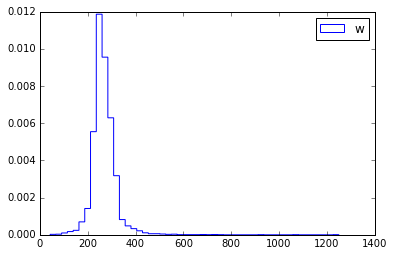

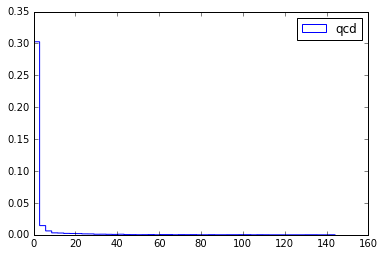

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(vals_w, histtype="step", label="w", bins=50, normed=1)
plt.legend()
plt.show()

plt.hist(vals_qcd, histtype="step", label="qcd", bins=50, normed=1)
plt.legend()
plt.show()

# Z vs background

In [3]:
length = 39473

background = load_from_pickle("/home/gilles/gdrive/research/sandbox/learning-qcd-rnn/data/z/anti-kt/antikt-background.pickle", length)
signal = load_from_pickle("/home/gilles/gdrive/research/sandbox/learning-qcd-rnn/data/z/anti-kt/antikt-mH700.pickle", length)

X_train = []
y_train = []
X_test = []
y_test = []

for i in range(length-10000):
    X_train.append(background[i])
    y_train.append(0)
for i in range(length-10000):
    X_train.append(signal[i])
    y_train.append(1)
for i in range(length-10000, length):
    X_test.append(background[i])
    y_test.append(0)
for i in range(length-10000, length):
    X_test.append(signal[i])
    y_test.append(1)
    
fd = open("../data/z/anti-kt/antikt-train.pickle", "wb")
pickle.dump((X_train, y_train), fd, protocol=pickle.HIGHEST_PROTOCOL)
fd.close()
fd = open("../data/z/anti-kt/antikt-test.pickle", "wb")
pickle.dump((X_test, y_test), fd, protocol=pickle.HIGHEST_PROTOCOL)
fd.close()